In [5]:
import random
import pickle
import os
import cv2
import numpy as np
import tensorflow
from PIL import Image
from matplotlib import pyplot as plt
from patchify import patchify
from enum import Enum
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from predict_B_fun import predict_modelB
from predict_A_fun import predict_modelA


In [6]:
scale = 1
# enlarge pixel size
# eg. scale 4 changes pixel size from 25x25cm to 100x100cm

chosen_model = 1
# 1 for Model A
# 2 for Model B
# 3 for Model C


In [7]:
root_directory = r"C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset"

image_paths = []
mask_paths = []

for path, subdirs, files in sorted(os.walk(root_directory)):
    dirname = path.split(os.path.sep)[-1]
    if dirname == "images":
        image_paths.extend([os.path.join(path, img_name) for img_name in sorted(files)])
    elif dirname == "masks":
        mask_paths.extend([os.path.join(path, mask_name) for mask_name in sorted(files)])

print("Number of tiles:",len(image_paths))


print("Image paths:")
for img_path in image_paths:
    print(img_path)

print("\nMask paths:")
for mask_path in mask_paths:
    print(mask_path)



Number of tiles: 72
Image paths:
C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset\Tile 1\images\image_part_001.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset\Tile 1\images\image_part_002.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset\Tile 1\images\image_part_003.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset\Tile 1\images\image_part_004.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset\Tile 1\images\image_part_005.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset\Tile 1\images\image_part_006.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset\Tile 1\images\image_part_007.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segmentation dataset\Tile 1\images\image_part_008.jpg
C:\Users\jiric\Documents\VUT\BP\DATASETS\DUBAI_DS\Semantic segm

In [8]:
# print(len(image_paths))
# print(len(mask_paths))

if len(image_paths) == len(mask_paths):
    print("Lists of images and masks paths consist of the same number of elements:", len(image_paths))
else:
    print("ERROR: Different number of images and masks")

paths_length = len(image_paths)

accuracy_values = []
jaccard_values = []

for i in range(paths_length):

    print("\n IMAGE",i+1,"/",paths_length,"\n")
    
    mask_path = mask_paths[i]
    image_path = image_paths[i]

    if chosen_model == 1:
        image_original, image_cropped, image_prediction = predict_modelA(image_path,scale)
    elif chosen_model == 2:
        image_original, image_cropped, image_prediction = predict_modelB(image_path,scale)
    elif chosen_model == 3:
        image_original, image_cropped, image_prediction = predict_modelC(image_path,scale)
    else:
        print("ERROR: INVALID MODEL CHOSEN")


    mask_original = cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2RGB)
    mask_scaled = cv2.resize(mask_original, (mask_original.shape[1] // scale, mask_original.shape[0] // scale))

    new_height_m = image_cropped.shape[0]
    new_width_m = image_cropped.shape[1]

    mask_cropped = mask_scaled[: new_height_m, : new_width_m, :]    

    print("Cropped mask shape:", mask_cropped.shape)
    print("Cropped mask values", np.unique(mask_cropped))

    if (mask_cropped.shape[:] == image_cropped.shape[:]):
        print("MASK AND IMAGE SHAPE CONSISTENT")
    else:
        print("ERROR: DIFFERENT SHAPE FOR MASK AND IMAGE")

    mask_flat = mask_cropped.flatten()
    pred_flat = image_prediction.flatten()

    sk_acc = accuracy_score(mask_flat, pred_flat)
    sk_jac = jaccard_score(mask_flat, pred_flat, average="macro")

    accuracy_values.append(sk_acc)
    jaccard_values.append(sk_jac)

    print("Prediction accuracy:", sk_acc)
    print("Prediction jaccard index:", sk_jac)

    

Lists of images and masks paths consist of the same number of elements: 72

 IMAGE 1 / 72 

Original image shape: (644, 797, 3)
FINNAL TIME: 1.3487544059753418
Predicted image shape: (640, 640, 3)
Cropped mask shape: (640, 640, 3)
Cropped mask values [ 16  41  60 110 132 152 155 169 193 226 228 246]
MASK AND IMAGE SHAPE CONSISTENT
Prediction accuracy: 0.799951171875
Prediction jaccard index: 0.299171790797737

 IMAGE 2 / 72 

Original image shape: (644, 797, 3)
FINNAL TIME: 1.24021577835083
Predicted image shape: (640, 640, 3)
Cropped mask shape: (640, 640, 3)
Cropped mask values [ 41 110 132 155 169 193 226 228 246]
MASK AND IMAGE SHAPE CONSISTENT
Prediction accuracy: 0.8973876953125
Prediction jaccard index: 0.31114391187031154

 IMAGE 3 / 72 

Original image shape: (644, 797, 3)
FINNAL TIME: 1.3018693923950195
Predicted image shape: (640, 640, 3)
Cropped mask shape: (640, 640, 3)
Cropped mask values [ 16  41  58  60 110 132 152 155 169 193 221 226 228 246 254]
MASK AND IMAGE SHAPE C

In [9]:
print(len(accuracy_values))
print(len(jaccard_values))

mean_j = np.mean(jaccard_values)
mean_a = np.mean(accuracy_values)

print(mean_a)
print(mean_j)

idm = jaccard_values.index(max(jaccard_values))
print(idm)

72
72
0.8551301686513357
0.515407009041732
53


Original image shape: (838, 859, 3)
FINNAL TIME: 1.505519151687622
Predicted image shape: (800, 800, 3)
Cropped mask shape:  (800, 800, 3)
ACCURACY =  0.938290625
JACCARD INDEX =  0.4660355723744166


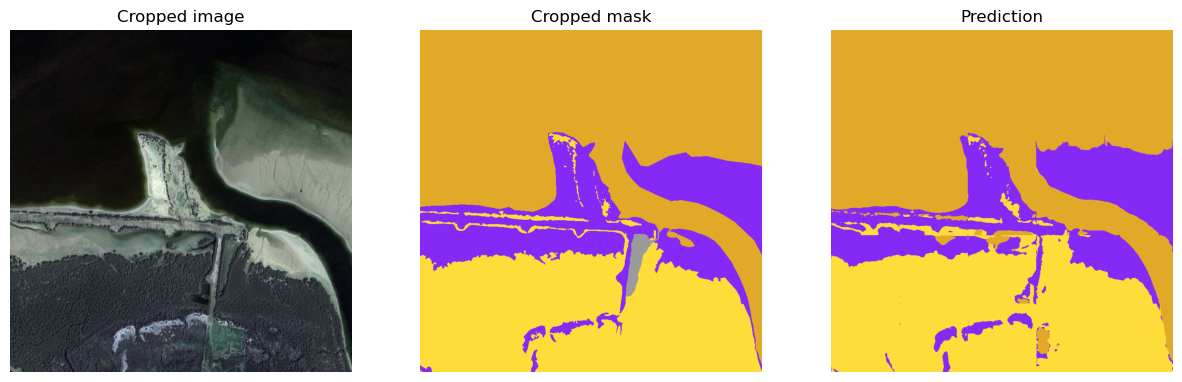

In [13]:
idw = random.randint(0, len(accuracy_values) - 1)

if chosen_model == 1:
    _ , image_sample, prediction_sample = predict_modelA(image_paths[idw],scale)
elif chosen_model == 2:
    _ , image_sample, prediction_sample = predict_modelB(image_paths[idw],scale)

mask_sample = cv2.imread(mask_paths[idw])
mask_sample = cv2.cvtColor(mask_sample, cv2.COLOR_BGR2RGB)
new_height_m = image_cropped.shape[0]
new_width_m = image_cropped.shape[1]

mask_scaled = cv2.resize(mask_sample, (mask_sample.shape[1] // scale, mask_sample.shape[0] // scale))

new_height_m = prediction_sample.shape[0]
new_width_m = prediction_sample.shape[1]

mask_sample = mask_scaled[: new_height_m, : new_width_m, :]

print("Cropped mask shape: ", mask_sample.shape)


print("ACCURACY = ", accuracy_values[idw])
print("JACCARD INDEX = ", jaccard_values[idw])

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(image_sample)
plt.title('Cropped image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_sample)
plt.title('Cropped mask')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(prediction_sample, cmap='binary')
plt.title('Prediction')
plt.axis('off')

plt.show()

In [14]:
print(accuracy_score(mask_sample.flatten(), prediction_sample.flatten()))
print(jaccard_score(mask_sample.flatten(), prediction_sample.flatten(), average='macro'))

0.938290625
0.4660355723744166
